In [18]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [10 , 3]
from astropy.coordinates import spherical_to_cartesian

NSIDE = 4
m = 6
Mbh = 10**m 
Rt =  Mbh**(1/3)

In [19]:
phis = np.zeros(192)
thetas = np.zeros(192)
phis_astro = np.zeros(192)
thetas_astro = np.zeros(192)

for i in range(0,192):
    thetas[i], phis[i] = hp.pix2ang(NSIDE, i) #the ones you use in math
    phis_astro[i] = phis[i] - np.pi # Enforce theta in -pi to pi
    thetas_astro[i] = thetas[i] - np.pi/2 # Enforce theta in -pi/2 to pi/2


In [20]:
x = np.sin(thetas) * np.cos(phis)
y = np.sin(thetas) * np.sin(phis)
z = np.cos(thetas)

In [21]:
print(np.max(thetas))
print(np.max(phis))

2.9371124546212584
6.086835766330223


In [22]:
# Reshape
radii_test = np.ones(192)
many_test_thetas = np.repeat(thetas_astro, len(radii_test))
many_test_phis = np.repeat(phis_astro, len(radii_test))
many_test_radii = list(radii_test)
many_test_radii *= 192 # num of observers 
our_test_x, our_test_y, our_test_z = spherical_to_cartesian(many_test_radii, many_test_thetas, many_test_phis)

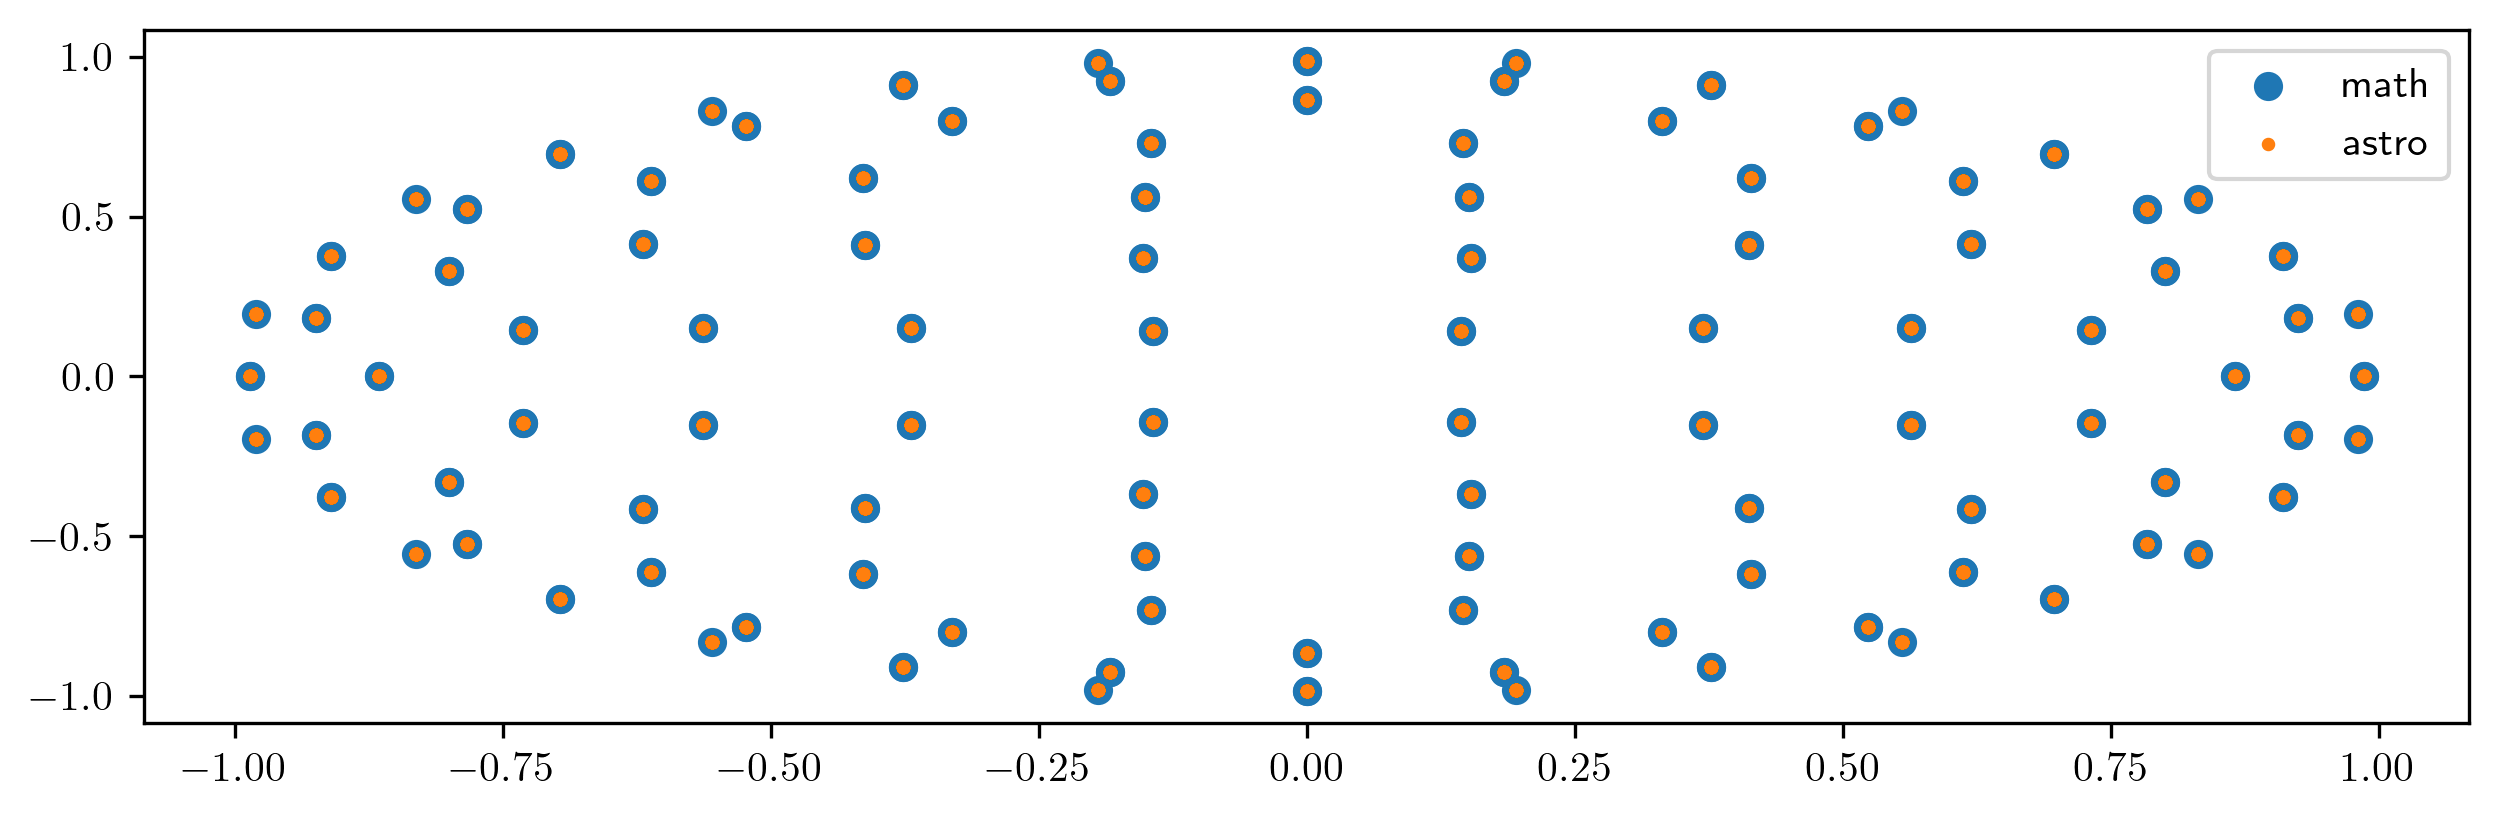

In [23]:
plt.scatter(x, y, label = 'math')
plt.scatter(our_test_x, our_test_y, s = 5, label = 'astro')
plt.legend()

In [32]:
start = 0.01 #Rt #Solar radii
stop = 20_000 
log_start = np.log10(start)
log_stop = np.log10(stop)
log_radii = np.linspace(log_start, log_stop, 7000) #simulator units
radii = 10**log_radii

In [33]:
many_radii = list(radii)
many_thetas = np.repeat(thetas_astro, len(radii))
many_phis = np.repeat(phis_astro, len(radii))
many_radii = list(radii)
many_radii *= 192 # num of observers
our_x, our_y, our_z = spherical_to_cartesian(many_radii, many_thetas, many_phis)

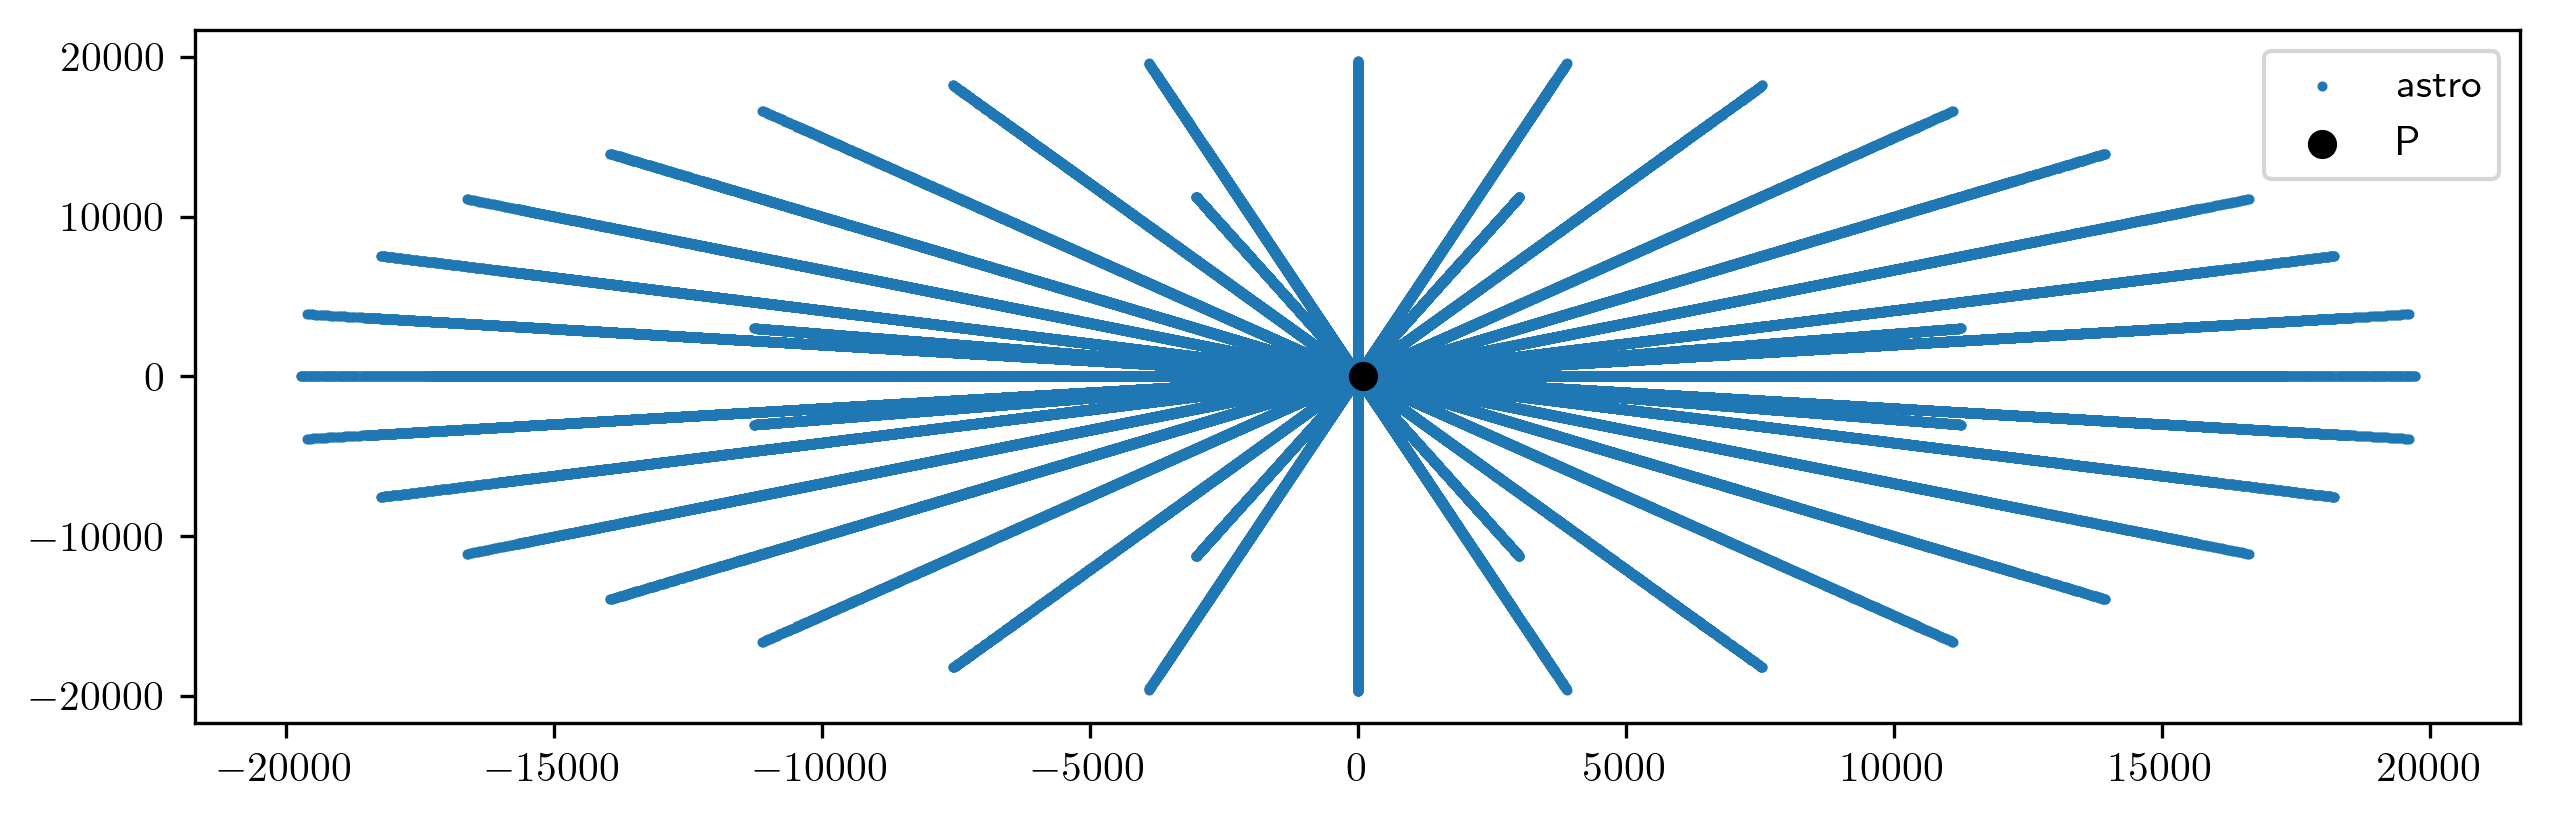

In [34]:
plt.scatter(our_x, our_y, s = 2, label = 'astro')
plt.scatter(Rt, 0, c = 'k', label = 'P') #suppose that Rt=100
plt.legend()

In [35]:
fix = '844'

X = np.load( str(m) + '/'  + fix + '/CMx_' + fix + '.npy')
X -= Rt
Y = np.load( str(m) + '/'  + fix + '/CMy_' + fix + '.npy')
Z = np.load( str(m) + '/'  + fix + '/CMz_' + fix + '.npy')


/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


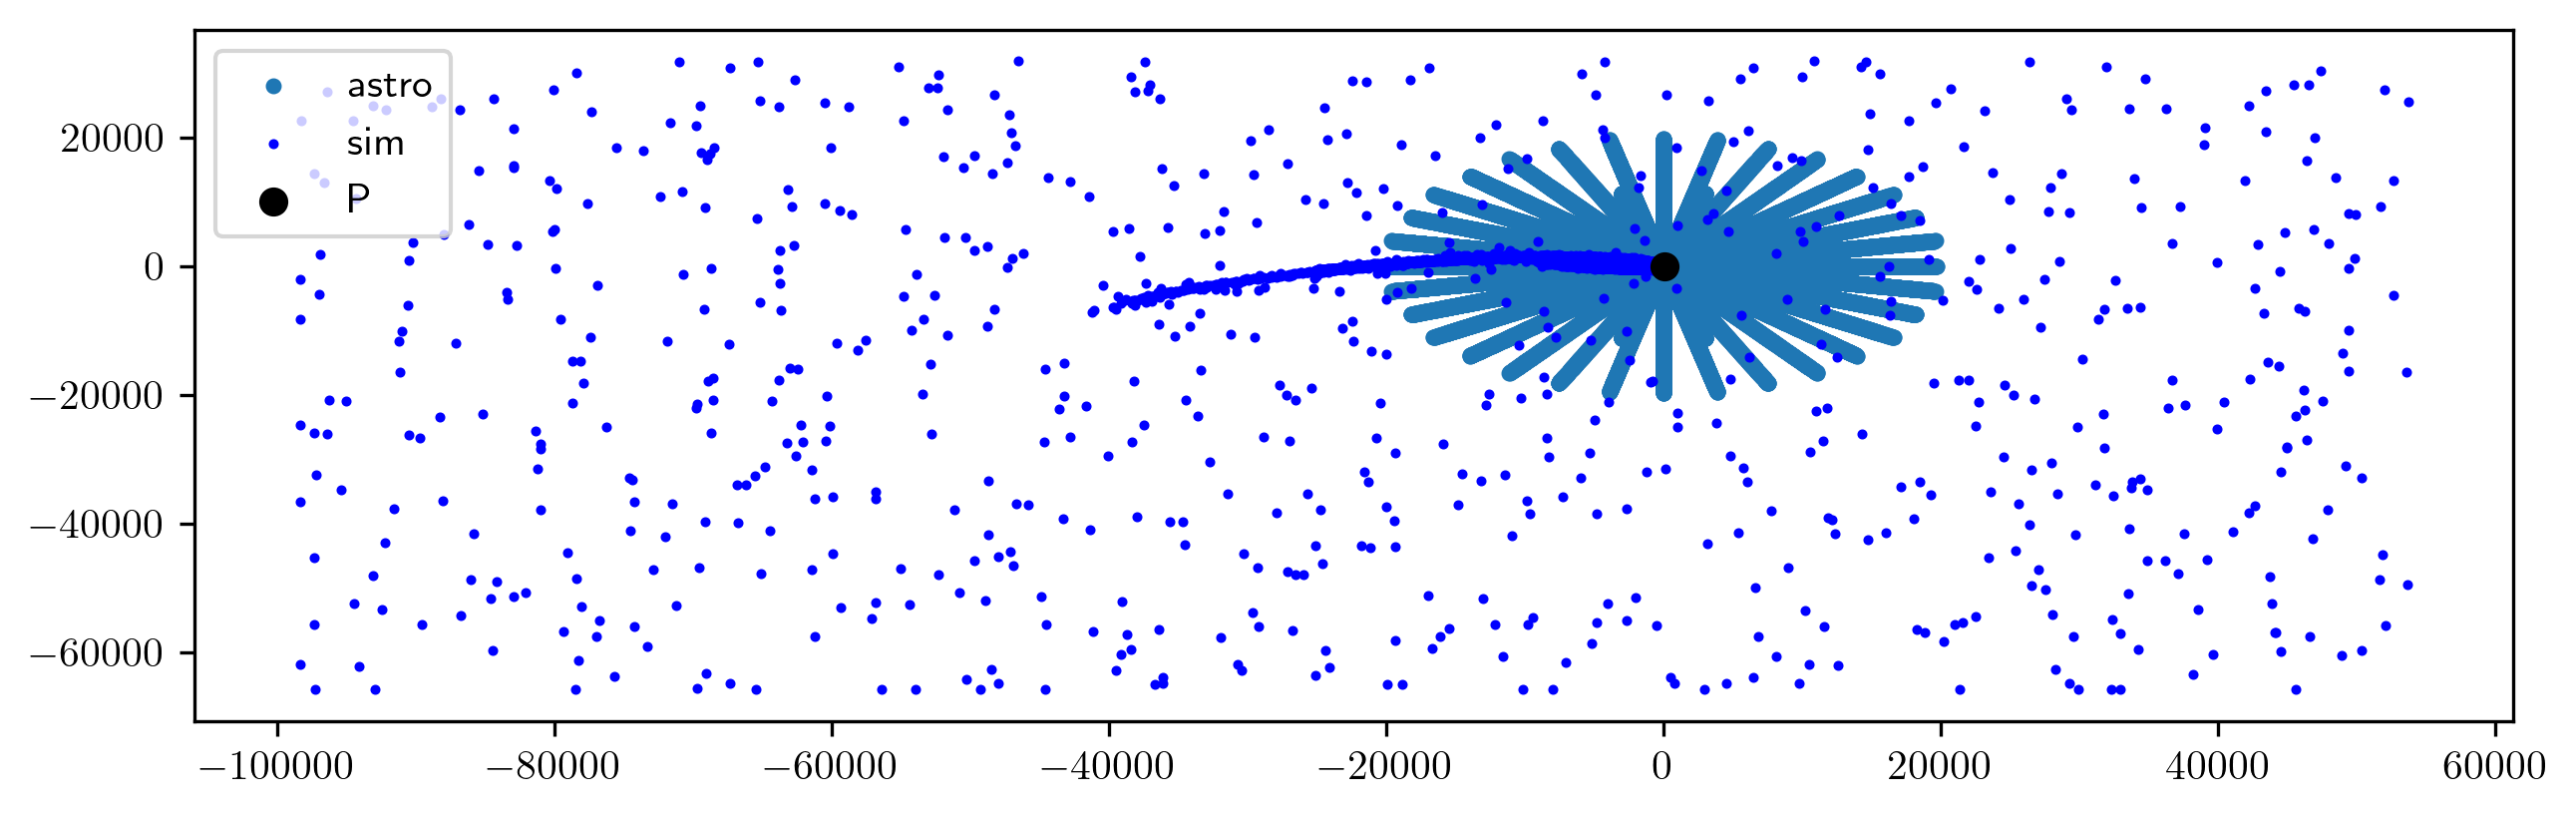

In [36]:
plt.scatter(our_x, our_y, s = 8, label = 'astro')
plt.scatter(X[0:len(X):2000],Y[0:len(X):2000], s = 2, c = 'b', label = 'sim')
plt.scatter(Rt, 0, c = 'k', label = 'P') 
plt.legend()